# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

Primero importaremos datos desde un archivo con extensión `.csv`

In [10]:
import pandas as pd
import numpy as np

In [4]:
# Importamos los datos desde un archivo separado por comas
df=pd.read_csv('META.csv')

In [6]:
# Visualizamos las primeras 5 filas
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
3,2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
4,2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700
5,2017-06-08,154.080002,154.729996,153.100006,154.710007,154.710007,17799400
6,2017-06-09,154.770004,155.589996,146.610001,149.600006,149.600006,35577700
7,2017-06-12,148.169998,149.199997,144.559998,148.440002,148.440002,33170200
8,2017-06-13,150.149994,151.179993,148.899994,150.679993,150.679993,20483400
9,2017-06-14,151.259995,152.399994,149.050003,150.250000,150.250000,20808800


In [7]:
# Visualizamos las últimas 5 filas
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1266,2022-06-10,183.039993,183.100006,175.020004,175.570007,175.570007,27450800
1267,2022-06-13,170.589996,172.580002,164.029999,164.259995,164.259995,31749300
1268,2022-06-14,166.029999,166.750000,161.360001,163.729996,163.729996,27244300
1269,2022-06-15,167.199997,172.160004,163.979996,169.350006,169.350006,30008300
1270,2022-06-16,163.720001,165.080002,159.610001,160.869995,160.869995,26944100


Ahora lo haremos desde Yahoo Finance

In [3]:
# Descargamos datos desde junio del 2017 a la fecha :)
name='META'
start='2017-06-01'
end='2023-04-17'

In [ ]:
!pip install yfinance

In [34]:
!conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2022.05                  py39_0  
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  custom                   py39_1  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.6.6     

In [1]:
import yfinance as yf

In [19]:
yf.download?

In [9]:
df_web=yf.download(name,start,end)
df_web.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400


In [41]:
df_web.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-13,215.729996,221.149994,215.690002,220.350006,220.350006,23310400
2023-04-14,217.880005,222.110001,217.550003,221.490005,221.490005,21574200


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

¿Cómo lucen estos datos?

<AxesSubplot:xlabel='Date'>

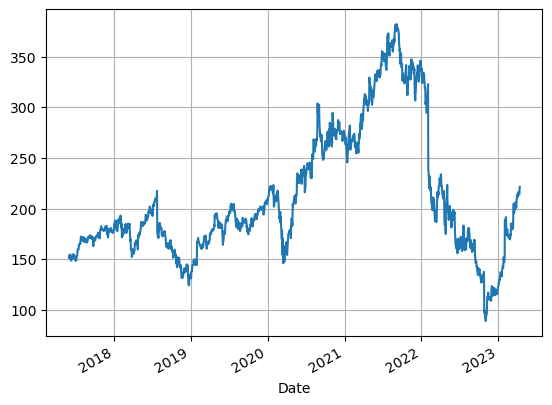

In [42]:
df_web['Adj Close'].plot(grid=True)

In [43]:
df_web.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [44]:
# Accediendo a la columna:
# df_web['Adj Close']
#
# Accediendo a la fila
df_web.loc['2022-06-16']

Open         1.637200e+02
High         1.650800e+02
Low          1.596100e+02
Close        1.608700e+02
Adj Close    1.608700e+02
Volume       2.694410e+07
Name: 2022-06-16 00:00:00, dtype: float64

In [46]:
df_web.iloc[4] # Fecha='2017-06-07'

Open         1.532700e+02
High         1.537500e+02
Low          1.523400e+02
Close        1.531200e+02
Adj Close    1.531200e+02
Volume       1.206670e+07
Name: 2017-06-07 00:00:00, dtype: float64

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [12]:
df_web['Adj Close']['2017-06-07']

153.1199951171875

In [13]:
df_web.loc['2017-06-07','Adj Close']

153.1199951171875

<AxesSubplot:xlabel='Date'>

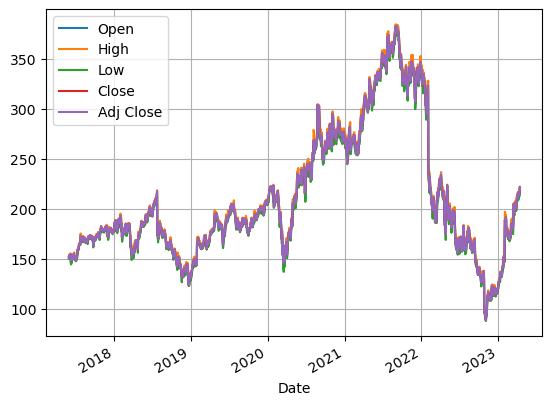

In [17]:
df_web.drop(columns='Volume').plot(grid=True)

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [18]:
start,end

('2017-06-01', '2023-04-17')

[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Date'>

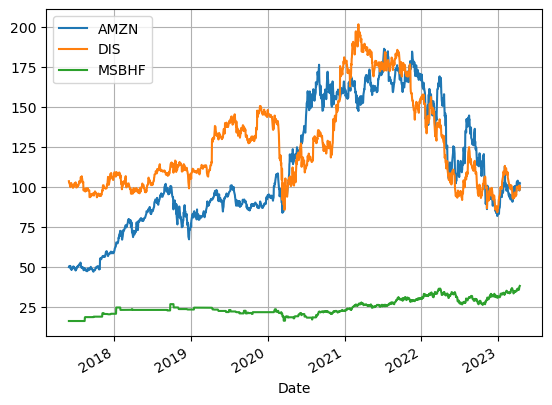

In [20]:
names=['AMZN', 'MSBHF', 'DIS'] # Amazon, Mitsubishi, Disney
datos=yf.download(names,start,end)['Adj Close']
datos.plot(grid=True)

In [21]:
R=(datos-datos.shift())/datos.shift() # datos.shift() -> regresa la variable datos desplazada 1 casilla
R.head()

,AMZN,DIS,MSBHF
Date,,,
2017-06-01,NaN,NaN,NaN
2017-06-02,0.010824,-0.009519,0.0
2017-06-05,0.004579,-0.006158,0.0
2017-06-06,-0.008246,-0.009576,0.0
2017-06-07,0.007049,0.003981,0.0


In [22]:
# Eliminamos la primera casilla (casillas con NaN)
R.dropna(inplace=True)
R.head()

,AMZN,DIS,MSBHF
Date,,,
2017-06-02,0.010824,-0.009519,0.0
2017-06-05,0.004579,-0.006158,0.0
2017-06-06,-0.008246,-0.009576,0.0
2017-06-07,0.007049,0.003981,0.0
2017-06-08,0.000198,-0.015106,0.0


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

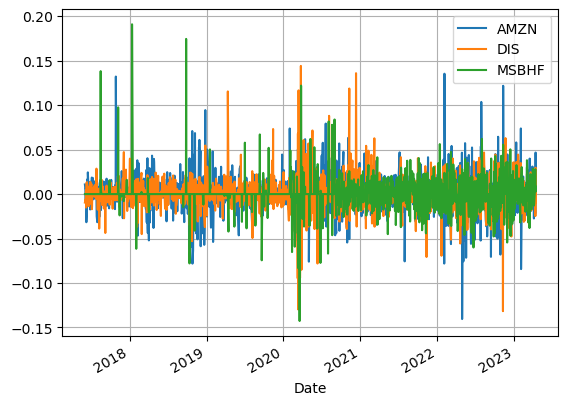

In [23]:
R.plot(grid=True)

array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'MSBHF'}>, <AxesSubplot:>]],
      dtype=object)

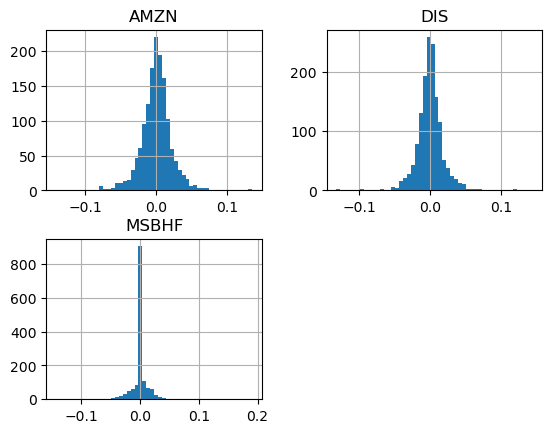

In [25]:
R.hist(bins=50)

In [26]:
R.mean() # Media

AMZN     0.000731
DIS      0.000168
MSBHF    0.000731
dtype: float64

In [27]:
R.std() # Desviación estandar

AMZN     0.022019
DIS      0.019692
MSBHF    0.017276
dtype: float64

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [29]:
r=np.log(datos/datos.shift()).dropna()
r.head()

,AMZN,DIS,MSBHF
Date,,,
2017-06-02,0.010766,-0.009564,0.0
2017-06-05,0.004569,-0.006177,0.0
2017-06-06,-0.008281,-0.009622,0.0
2017-06-07,0.007024,0.003973,0.0
2017-06-08,0.000198,-0.015221,0.0


In [30]:
r.mean()

AMZN     0.000489
DIS     -0.000025
MSBHF    0.000584
dtype: float64

In [31]:
r.std()

AMZN     0.021999
DIS      0.019648
MSBHF    0.017061
dtype: float64

In [32]:
r.describe() # Resumen estadístico

,AMZN,DIS,MSBHF
count,1477.000000,1477.000000,1477.000000
mean,0.000489,-0.000025,0.000584
std,0.021999,0.019648,0.017061
min,-0.151398,-0.141139,-0.153999
25%,-0.009888,-0.009011,0.000000
50%,0.001174,-0.000075,0.000000
75%,0.011611,0.008681,0.000324
max,0.126949,0.134639,0.174747


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'MSBHF'}>, <AxesSubplot:>]],
      dtype=object)

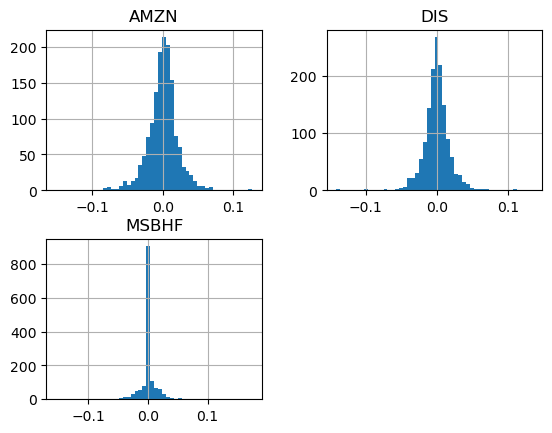

In [33]:
r.hist(bins=50)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.